In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
nhis_combined = pd.read_csv('artifacts/nhis_cleaned.csv', low_memory=False)
nhis_combined.head()
nhis_combined_length = len(nhis_combined)
print(nhis_combined_length)  #number of rows in total survey 

# make sure all data in var columns are int

nhis_combined = pd.DataFrame(nhis_combined)



nhis_combined['ARX12_1'] = pd.to_numeric(nhis_combined['ARX12_1'], errors='coerce')
nhis_combined['ARX12_3'] = pd.to_numeric(nhis_combined['ARX12_3'], errors='coerce')

187553


In [522]:
diabetes = nhis_combined[nhis_combined['DIBEV1']== 1]
diabetes_length = len(diabetes)
print(diabetes_length) # number in survey with diabetes


# make sure all data in var columns are int
#diabetes['ARX12_1'] = pd.to_numeric(diabetes['ARX12_1'], errors='coerce')
#diabetes['ARX12_3'] = pd.to_numeric(diabetes['ARX12_3'], errors='coerce')





20092


In [523]:
# %Survey adults with diabetes

percentage_all = diabetes_length/nhis_combined_length *100

print(percentage_all)

10.712705208661019


Total Survey is consistent with US population percentage with diabetes. 

In [524]:
# 2014 percentage with diabetes

total14 = nhis_combined[nhis_combined["Year"]==2014]
diabetes14 = diabetes[diabetes['Year']== 2014]

percentage_2014 = len(diabetes14)/len(total14) *100

print(percentage_2014)

10.442270485325777


In [525]:
# 2015 percentage with diabetes

total15 = nhis_combined[nhis_combined["Year"]==2015]
diabetes15 = diabetes[diabetes['Year']== 2015]

percentage_2015 = len(diabetes15)/len(total15) *100

print(percentage_2015)

10.8071988595866


In [526]:
# 2016 percentage with diabetes

total16 = nhis_combined[nhis_combined["Year"]==2016]
diabetes16 = diabetes[diabetes['Year']== 2016]

percentage_2016 = len(diabetes16)/len(total16) *100

print(percentage_2016)

10.654596100278551


In [527]:
# 2017 percentage with diabetes

total17 = nhis_combined[nhis_combined["Year"]==2017]
diabetes17 = diabetes[diabetes['Year']== 2017]

percentage_2017 = len(diabetes17)/len(total17) *100

print(percentage_2017)

10.515294293620522


In [528]:
# 2018 percentage with diabetes

total18 = nhis_combined[nhis_combined["Year"]==2018]
diabetes18 = diabetes[diabetes['Year']== 2018]

percentage_2018 = len(diabetes18)/len(total18) *100

print(percentage_2018)

11.547389542432231


In [529]:
# 2019 percentage with diabetes

total19 = nhis_combined[nhis_combined["Year"]==2019]
diabetes19 = diabetes[diabetes['Year']== 2019]

percentage_2019 = len(diabetes19)/len(total19) *100

print(percentage_2019)

10.485358002312717


In [530]:
#Percentage of survey patients with diabetes that did not fill a prescription due to cost

no_fill_percentage = diabetes.groupby('Year')['AHCAFYR1'].value_counts(normalize=True)

no_fill_percentage = no_fill_percentage.rename('Percent').reset_index()

no_fill_percentage['Percentage'] = no_fill_percentage['Percent'] * 100

no_fill = no_fill_percentage.loc[no_fill_percentage['AHCAFYR1'] == 1]

no_fill = pd.DataFrame(no_fill)

no_fill['Condition Status'] = 'Diabetes'


print(no_fill)



    Year  AHCAFYR1   Percent  Percentage Condition Status
1   2014         1  0.127349   12.734864         Diabetes
5   2015         1  0.121462   12.146194         Diabetes
10  2016         1  0.122478   12.247798         Diabetes
14  2017         1  0.118421   11.842105         Diabetes
17  2018         1  0.115843   11.584327         Diabetes
20  2019         1  0.120715   12.071535         Diabetes


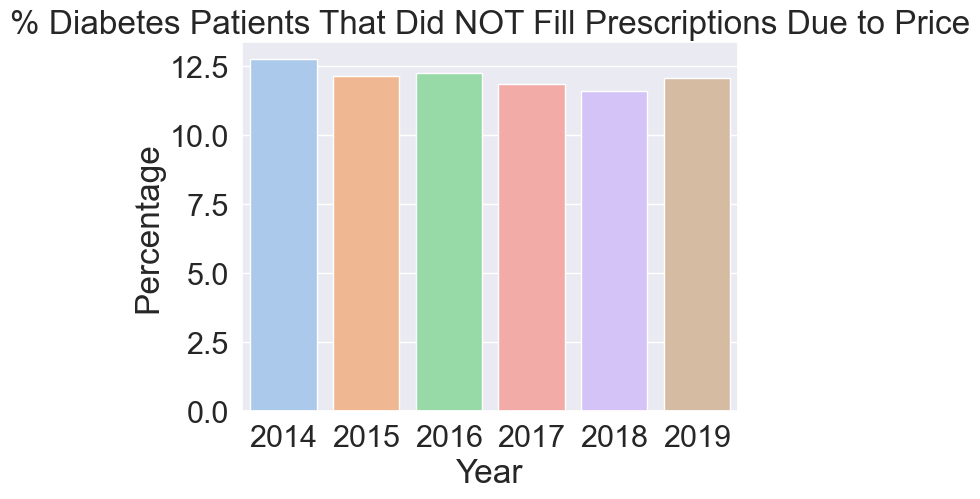

In [531]:
did_not_fill = sns.barplot(data= no_fill, x="Year", y="Percentage",errorbar=None, palette= 'pastel').set(title='% Diabetes Patients That Did NOT Fill Prescriptions Due to Price')


In [532]:
#Percentage of survey patients with diabetes skipped doses due to cost

Skipped_dose_percentage = diabetes.groupby('Year')['ARX12_1'].value_counts(normalize=True)

Skipped_dose_percentage = Skipped_dose_percentage.rename('Percent').reset_index()

Skipped_dose_percentage['Percentage'] = Skipped_dose_percentage['Percent'] * 100

Skipped_dose = Skipped_dose_percentage.loc[Skipped_dose_percentage['ARX12_1'] == 1]

Skipped_dose = pd.DataFrame(Skipped_dose)

Skipped_dose['Condition Status'] = 'Diabetes'

print(Skipped_dose)



    Year  ARX12_1   Percent  Percentage Condition Status
1   2014      1.0  0.100450   10.045020         Diabetes
4   2015      1.0  0.089065    8.906526         Diabetes
7   2016      1.0  0.083333    8.333333         Diabetes
11  2017      1.0  0.079511    7.951070         Diabetes
13  2018      1.0  0.083272    8.327192         Diabetes
16  2019      1.0  0.085087    8.508663         Diabetes


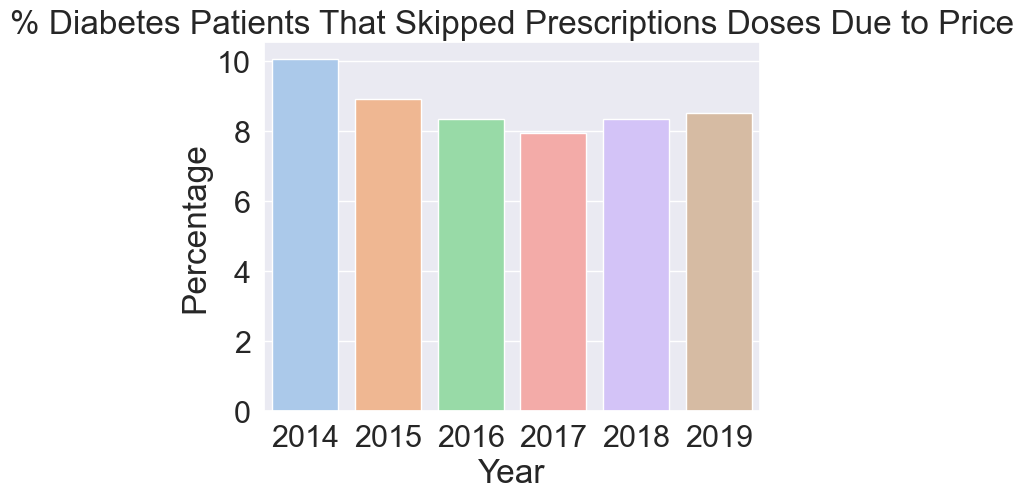

In [533]:
Skipped = sns.barplot(data= Skipped_dose, x="Year", y="Percentage",errorbar=None, palette= 'pastel').set(title='% Diabetes Patients That Skipped Prescriptions Doses Due to Price')


In [534]:
#Percentage of survey patients with diabetes that delayed doses due to cost

Delayed_percentage = diabetes.groupby('Year')['ARX12_3'].value_counts(normalize=True)

Delayed_percentage = Delayed_percentage.rename('Percent').reset_index()

Delayed_percentage['Percentage'] = Delayed_percentage['Percent'] * 100

Delayed = Delayed_percentage.loc[Delayed_percentage['ARX12_3'] == 1]

Delayed = pd.DataFrame(Delayed)

Delayed['Condition Status'] = 'Diabetes'

print(Delayed)

    Year  ARX12_3   Percent  Percentage Condition Status
1   2014      1.0  0.127462   12.746201         Diabetes
3   2015      1.0  0.113463   11.346267         Diabetes
7   2016      1.0  0.104693   10.469314         Diabetes
11  2017      1.0  0.106651   10.665138         Diabetes
14  2018      1.0  0.103906   10.390567         Diabetes
17  2019      1.0  0.105507   10.550743         Diabetes


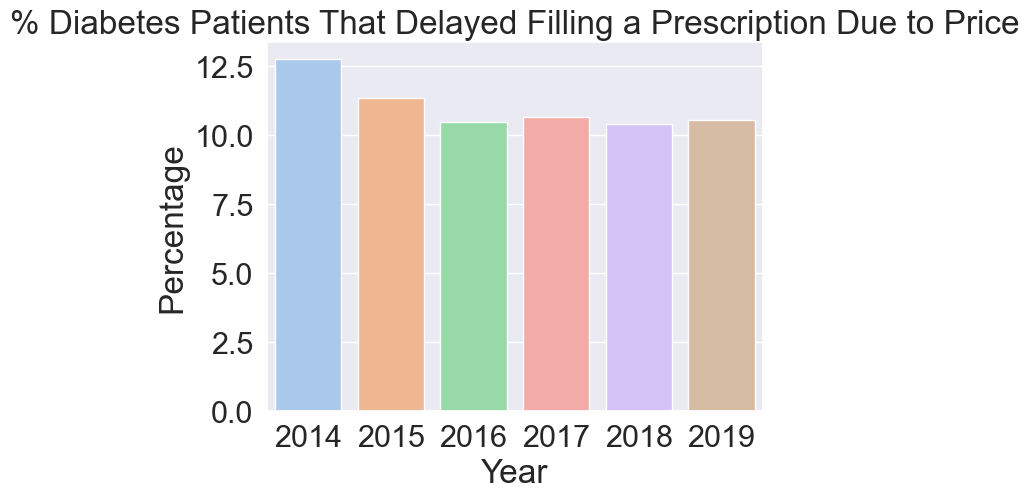

In [535]:
Delayed_fill = sns.barplot(data= Delayed, x="Year", y="Percentage",errorbar=None, palette= 'pastel').set(title='% Diabetes Patients That Delayed Filling a Prescription Due to Price')


In [536]:
# survey patients without diabetes

no_diabetes = nhis_combined[nhis_combined['DIBEV1']== 2]


#Percentage of survey patients without diabetes that did not fill a prescription due to cost

no_diabetes_nofill = no_diabetes.groupby('Year')['AHCAFYR1'].value_counts(normalize=True)

no_diabetes_nofill = no_diabetes_nofill.rename('Percent').reset_index()

no_diabetes_nofill = pd.DataFrame(no_diabetes_nofill)

no_diabetes_nofill['Percentage'] = no_diabetes_nofill['Percent'] * 100

no_fill_nodiabetes = no_diabetes_nofill.loc[no_diabetes_nofill['AHCAFYR1'] == 1]

no_fill_nodiabetes = pd.DataFrame(no_fill_nodiabetes)

no_fill_nodiabetes['Condition Status'] = 'No Diabetes'






no_fill_nodiabetes.head()

,Year,AHCAFYR1,Percent,Percentage,Condition Status
1,2014,1,0.063968,6.396847,No Diabetes
6,2015,1,0.058674,5.867373,No Diabetes
11,2016,1,0.056809,5.680904,No Diabetes
16,2017,1,0.054630,5.463039,No Diabetes
21,2018,1,0.058610,5.860958,No Diabetes


In [537]:
#Percentage of survey patients without diabetes that skipped doses due to cost

Skipped_dose_nodiabetes = no_diabetes.groupby('Year')['ARX12_1'].value_counts(normalize=True)

Skipped_dose_nodiabetes = Skipped_dose_nodiabetes.rename('Percent').reset_index()

Skipped_dose_nodiabetes['Percentage'] = Skipped_dose_nodiabetes['Percent'] * 100

Skipped_nodiabetes = Skipped_dose_nodiabetes.loc[Skipped_dose_nodiabetes['ARX12_1'] == 1]

Skipped_nodiabetes = pd.DataFrame(Skipped_nodiabetes)

Skipped_nodiabetes['Condition Status'] = 'No Diabetes'

Skipped_nodiabetes.head()

,Year,ARX12_1,Percent,Percentage,Condition Status
1,2014,1.0,0.064977,6.497689,No Diabetes
6,2015,1.0,0.058373,5.837267,No Diabetes
11,2016,1.0,0.055697,5.569676,No Diabetes
15,2017,1.0,0.055925,5.592534,No Diabetes
20,2018,1.0,0.052049,5.204857,No Diabetes


In [538]:
#Percentage of survey patients without diabetes that skipped doses due to cost

Delayed_nodiabetes = no_diabetes.groupby('Year')['ARX12_3'].value_counts(normalize=True)

Delayed_nodiabetes = Delayed_nodiabetes.rename('Percent').reset_index()

Delayed_nodiabetes['Percentage'] = Delayed_nodiabetes['Percent'] * 100

Delayed_nodiabetes = Delayed_nodiabetes.loc[Delayed_nodiabetes['ARX12_3'] == 1]

Delayed_nodiabetes['Condition Status'] = 'No Diabetes'

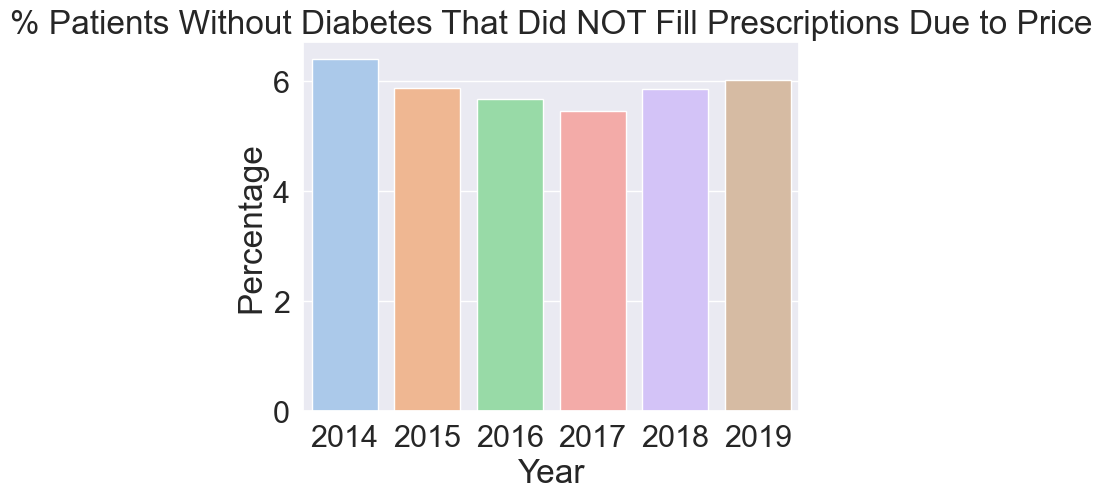

In [539]:
did_not_fill = sns.barplot(data= no_fill_nodiabetes, x="Year", y="Percentage",errorbar=None,palette= 'pastel').set(title='% Patients Without Diabetes That Did NOT Fill Prescriptions Due to Price')



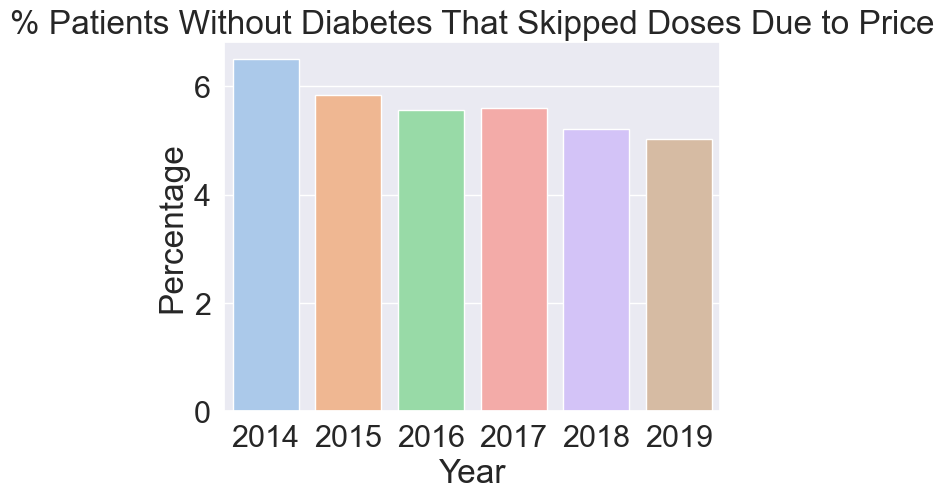

In [540]:
Skipped = sns.barplot(data= Skipped_nodiabetes, x="Year", y="Percentage",errorbar=None,palette= 'pastel').set(title='% Patients Without Diabetes That Skipped Doses Due to Price')



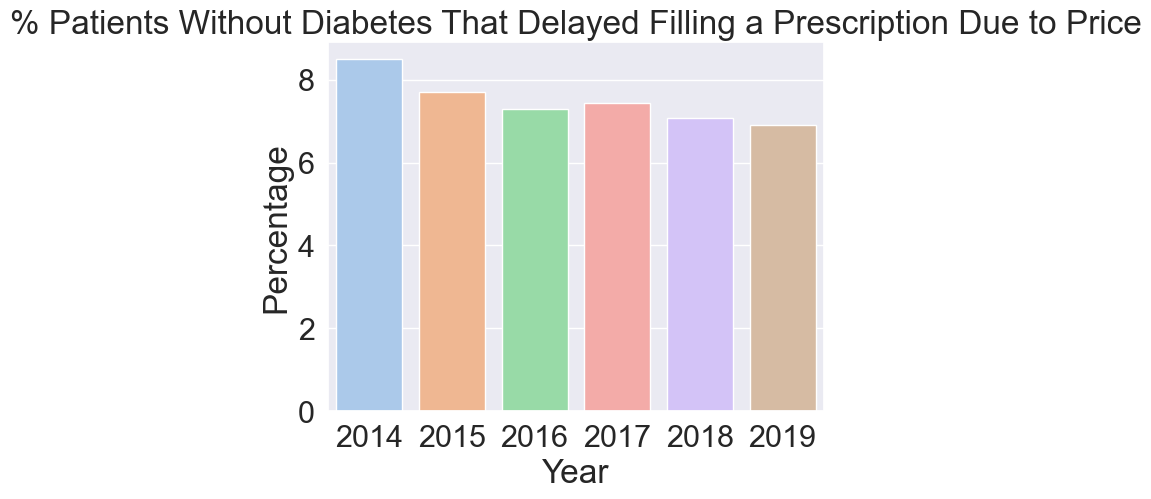

In [541]:
Delayed_fill = sns.barplot(data= Delayed_nodiabetes, x="Year", y="Percentage",errorbar=None, palette= 'pastel').set(title='% Patients Without Diabetes That Delayed Filling a Prescription Due to Price')


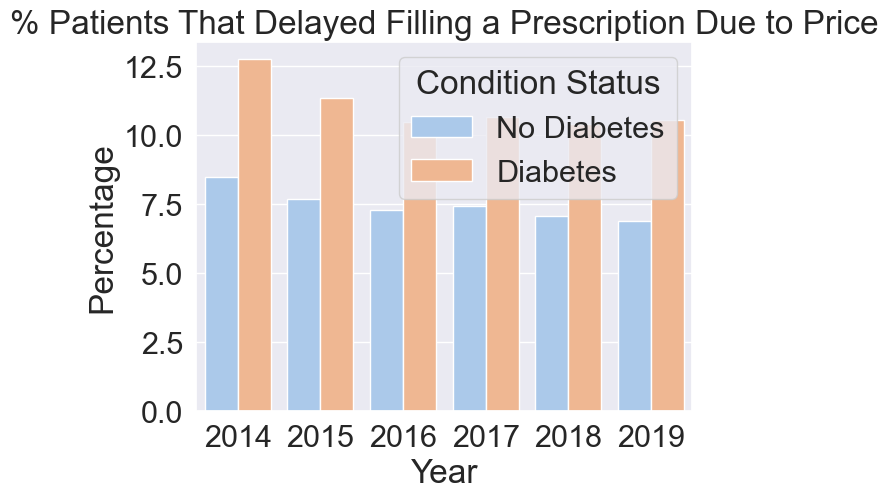

In [542]:
#combined conditions that delayed doses due to price

Delayed_merged = pd.concat([Delayed_nodiabetes, Delayed])

Delayed_merged_plot = sns.barplot(data= Delayed_merged, x="Year", y="Percentage", hue = 'Condition Status',errorbar=None, palette= 'pastel').set(title='% Patients That Delayed Filling a Prescription Due to Price')


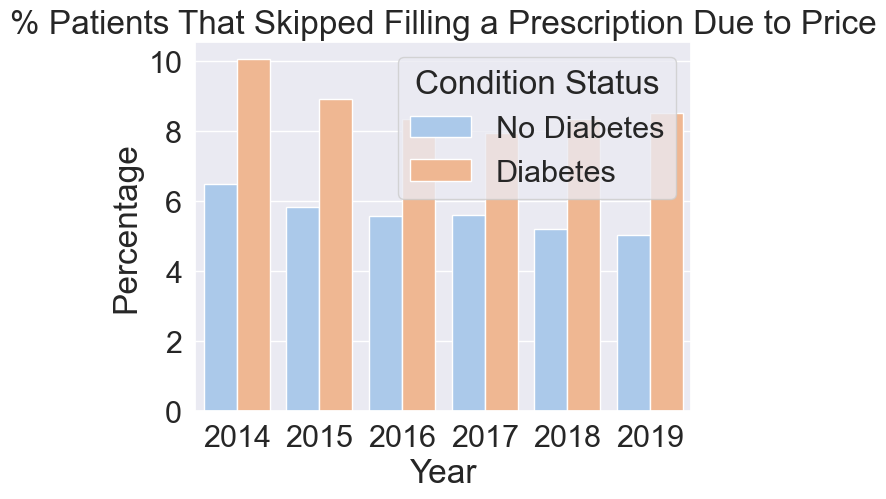

In [543]:
#combined conditions that skipped doses due to cost

Skipped_merged = pd.concat([Skipped_nodiabetes, Skipped_dose])

Skipped_merged_plot = sns.barplot(data= Skipped_merged, x="Year", y="Percentage", hue = 'Condition Status',errorbar=None, palette= 'pastel').set(title='% Patients That Skipped Filling a Prescription Due to Price')


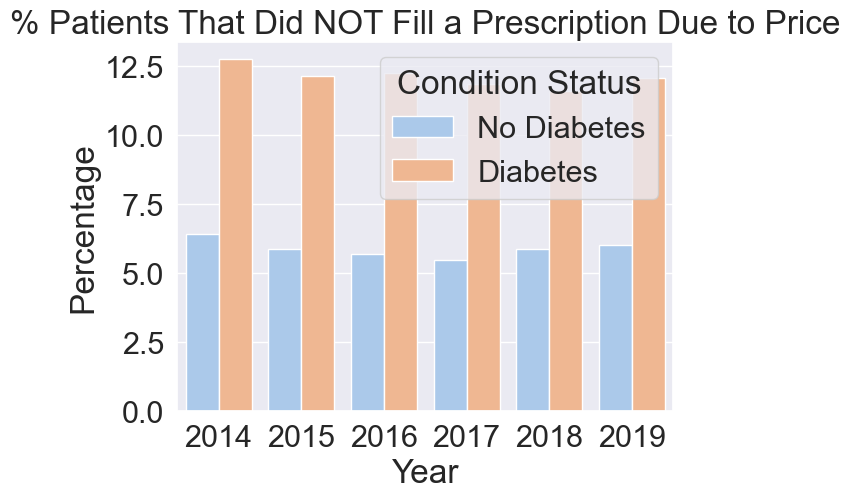

In [544]:
#combined conditions that did not fill a script due to cost

nofill_merged = pd.concat([no_fill_nodiabetes, no_fill])

nofill_merged_plot = sns.barplot(data= nofill_merged, x="Year", y="Percentage", hue = 'Condition Status',errorbar=None, palette= 'pastel').set(title='% Patients That Did NOT Fill a Prescription Due to Price')

   year    Total Cost  Year
0  2014  6.459039e+06  2014
1  2015  8.091384e+06  2015
2  2016  8.964845e+06  2016
3  2017  8.663583e+06  2017
4  2018  7.865565e+06  2018
5  2019  8.054568e+06  2019


(0.0, 20.0)

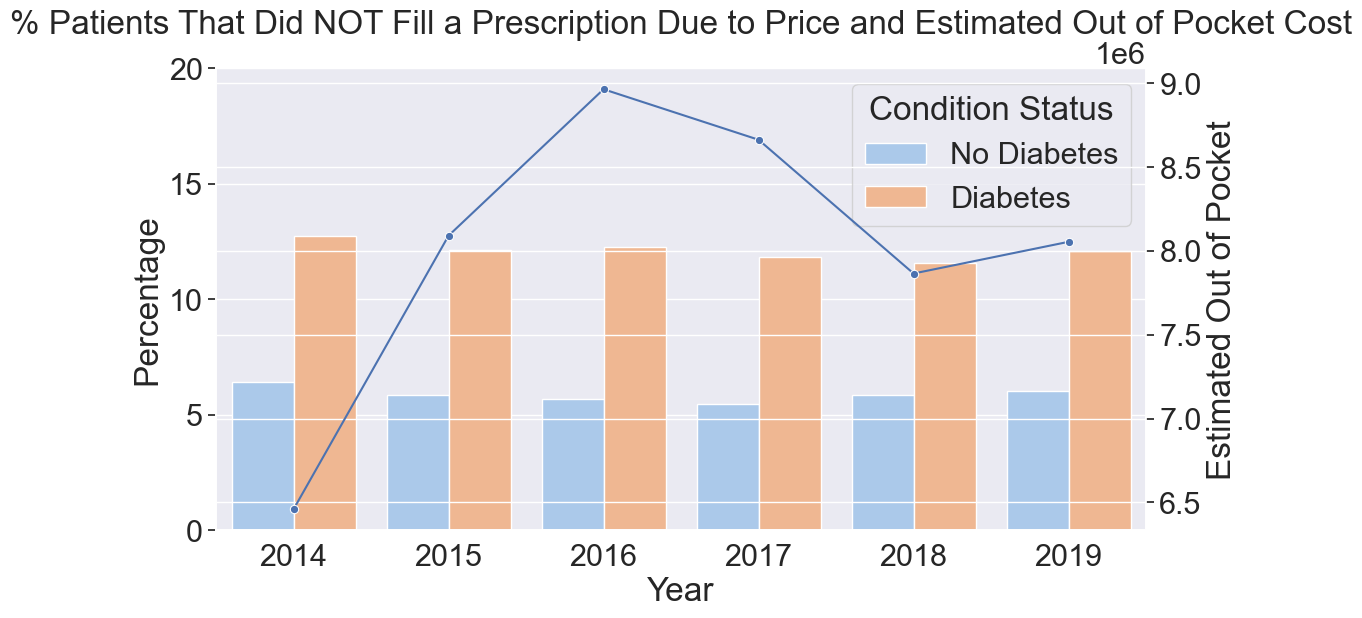

In [552]:

#combining drug pricing data with did not fill prescription survey data

drug_price = pd.read_csv('artifacts/diabetes_meds_prices.csv') 

totals = drug_price.groupby('year')['estimated_patient_out_of_pocket'].mean()



totals = totals.rename('Total Cost').reset_index()



total_cost =pd.DataFrame(totals)

total_cost['Year'] = total_cost['year']

print(total_cost)

prices_w_outcomes = pd.concat([total_cost,nofill_merged])

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))



ax2 = ax1.twinx()
sns.lineplot(data = prices_w_outcomes['Total Cost'], marker='o', sort = False, ax=ax2)
plt.ylabel('Estimated Out of Pocket')



sns.barplot(data= prices_w_outcomes, x="Year", y="Percentage", hue = 'Condition Status',errorbar=None, palette= 'pastel',ax=ax1).set(title='% Patients That Did NOT Fill a Prescription Due to Price and Estimated Out of Pocket Cost')
ax1.set_ylim(0,20)

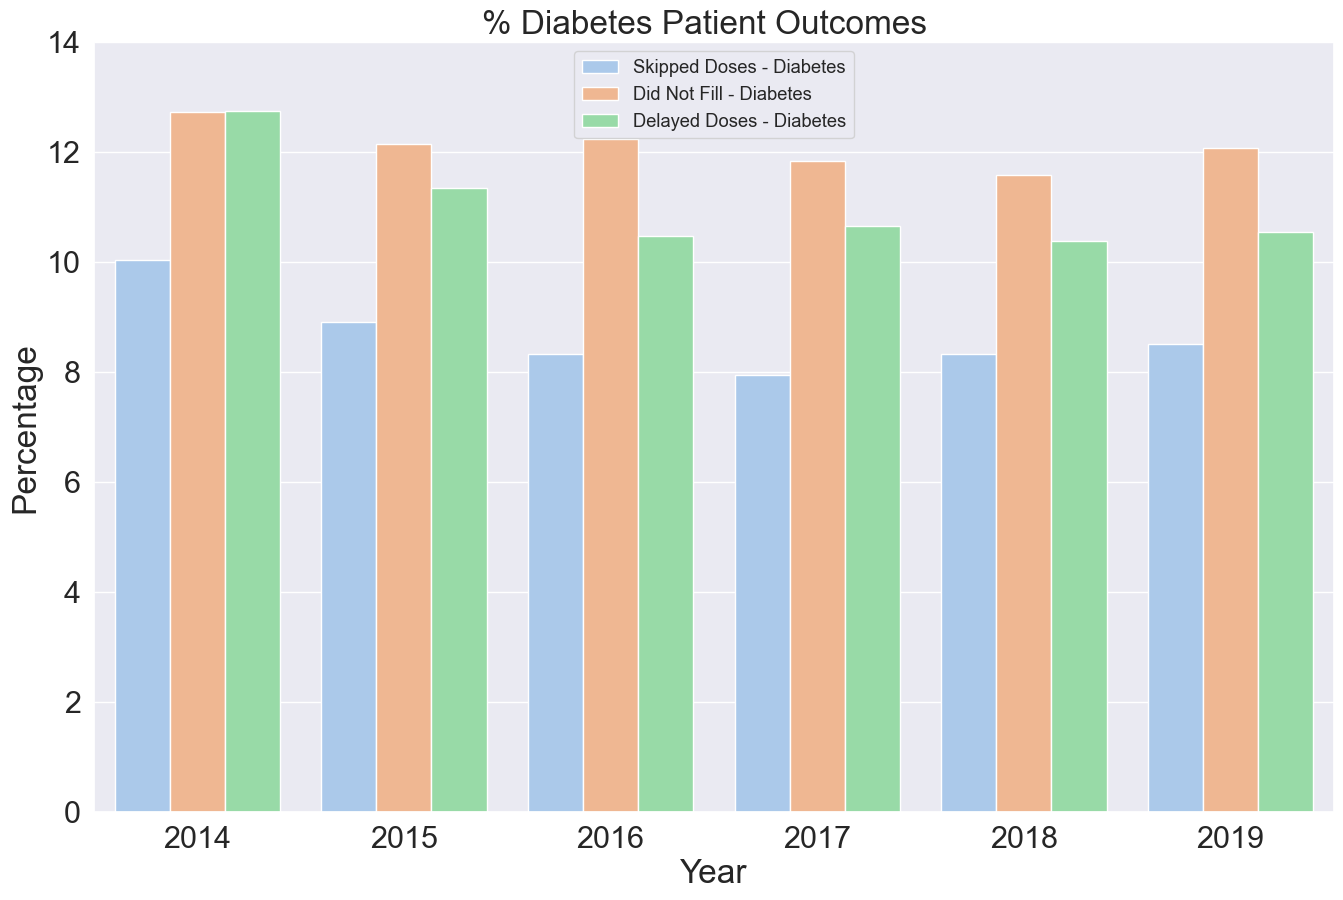

In [553]:
#combine compliance issues into one plot for diabetes patients in survey

Skipped_dose['Outcome'] = 'Skipped Doses - Diabetes'
no_fill['Outcome'] = 'Did Not Fill - Diabetes'
Delayed['Outcome'] = 'Delayed Doses - Diabetes'

Diabetes_outcome_merged = pd.concat([Skipped_dose,no_fill,Delayed])

axone = sns.set_style(style=None, rc=None )

figure, axone = plt.subplots(figsize=(16,10))

Diabetes_outcome_merged_plot = sns.barplot(data= Diabetes_outcome_merged, x="Year", y="Percentage", hue = 'Outcome',errorbar=None, palette= 'pastel', ax=axone).set(title='% Diabetes Patient Outcomes  ')
sns.set(font_scale=1.20)

axone.set_ylim(0,14)

plt.legend(loc='upper center')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


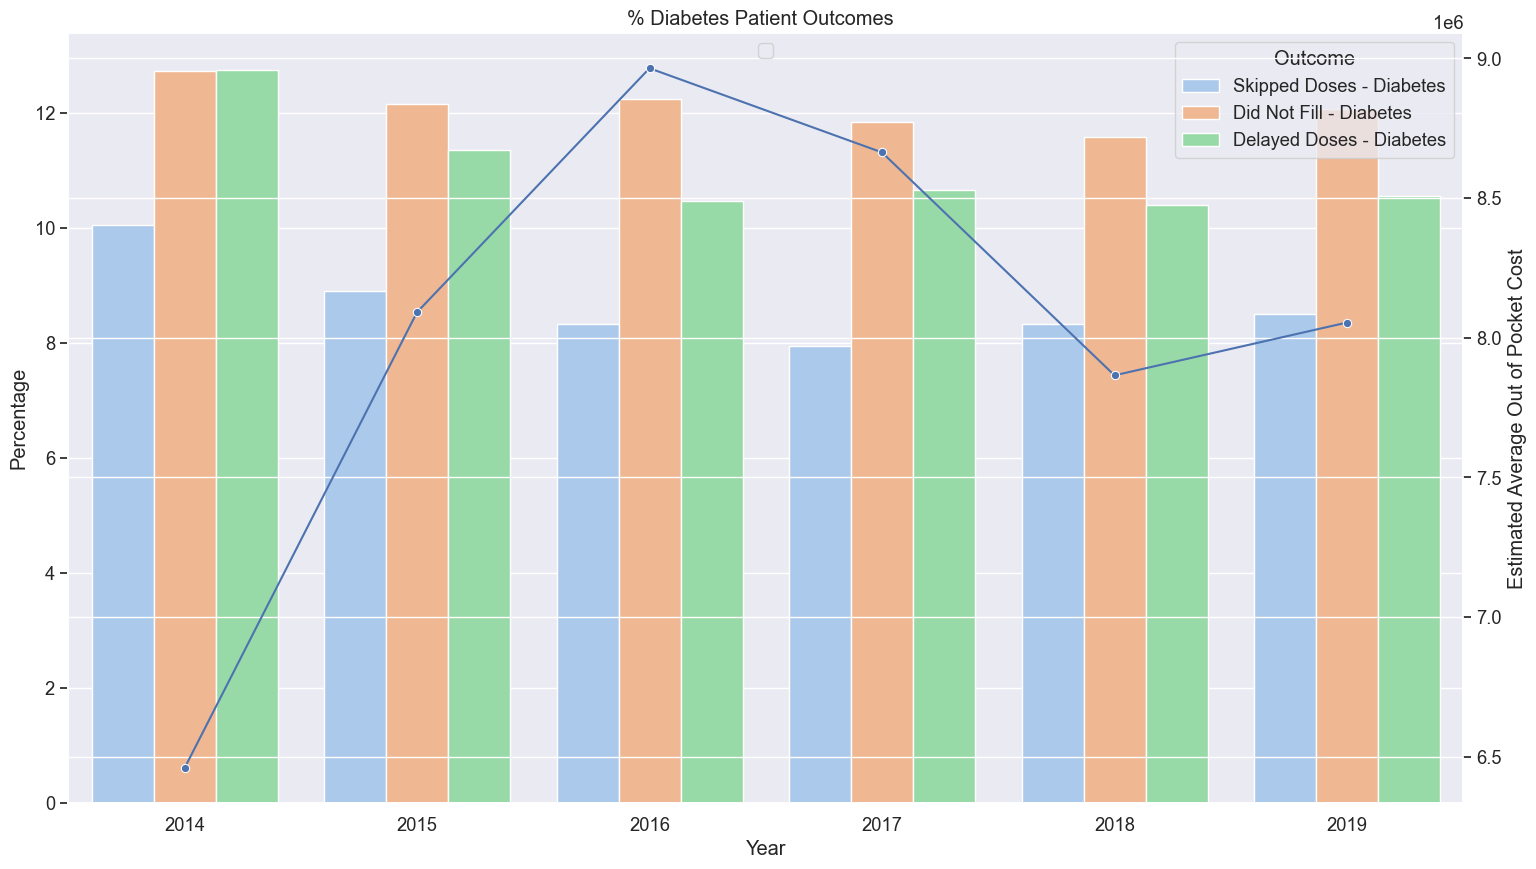

In [554]:
#bar and line plot to show compliance of diabetes patients vs avg cost out of pocket

axone = sns.set_style(style=None, rc=None )

figure, axone = plt.subplots(figsize=(18,10))

ax2 = axone.twinx()
sns.lineplot(data = prices_w_outcomes['Total Cost'], marker='o', sort = False, ax=ax2)
plt.ylabel('Estimated Average Out of Pocket Cost')
#ax2.set_ylim(5000000,10000000)


Diabetes_outcome_merged_plot = sns.barplot(data= Diabetes_outcome_merged, x="Year", y="Percentage", hue = 'Outcome',errorbar=None, palette= 'pastel', ax=axone).set(title='% Diabetes Patient Outcomes  ')
sns.set(font_scale=1.25)


plt.legend(loc='upper center')

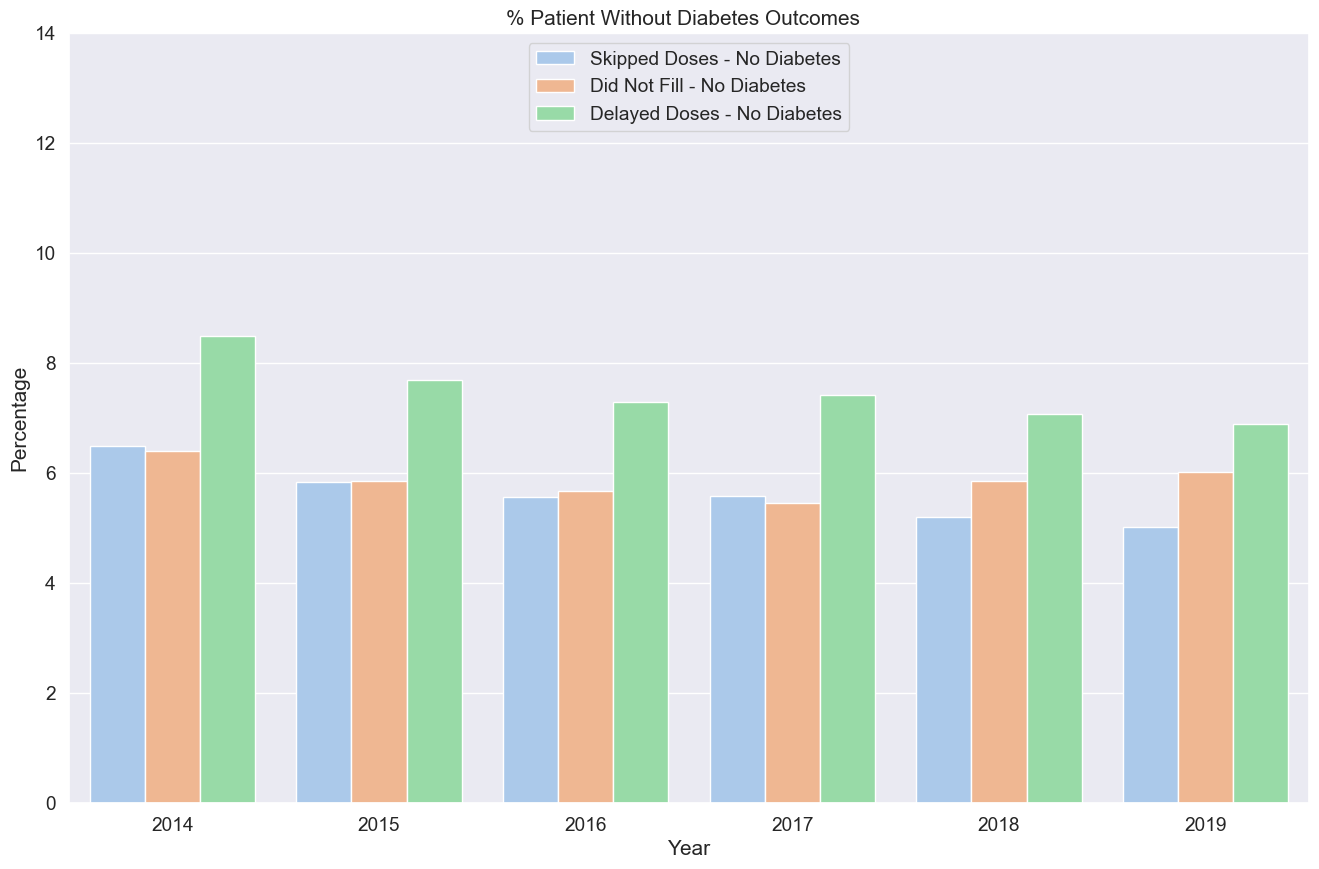

In [555]:

#combine compliance issues into one plot for no diabetes patients in survey

Skipped_nodiabetes['Outcome'] = 'Skipped Doses - No Diabetes'
no_fill_nodiabetes['Outcome'] = 'Did Not Fill - No Diabetes'
Delayed_nodiabetes['Outcome'] = 'Delayed Doses - No Diabetes'


No_diabetes_outcome_merged = pd.concat([Skipped_nodiabetes,no_fill_nodiabetes,Delayed_nodiabetes])

axone = sns.set_style(style=None, rc=None )

figure, axone = plt.subplots(figsize=(16,10))

No_diabetes_outcome_merged_plot = sns.barplot(data= No_diabetes_outcome_merged, x="Year", y="Percentage", hue = 'Outcome',errorbar=None, palette= 'pastel', ax=axone).set(title='% Patient Without Diabetes Outcomes  ')
sns.set(font_scale=1.25)

axone.set_ylim(0,14)

plt.legend(loc='upper center')

#print(No_diabetes_outcome_merged)

In [549]:
#Merged DFs with updated outcomes 

No_diabetes_outcome_merged = pd.DataFrame(No_diabetes_outcome_merged)
Diabetes_outcome_merged = pd.DataFrame(Diabetes_outcome_merged)


outcomes_merged_df = pd.concat([No_diabetes_outcome_merged,Diabetes_outcome_merged])

outcomes_merged_df.head()

,Year,ARX12_1,Percent,Percentage,Condition Status,Outcome,AHCAFYR1,ARX12_3
1,2014,1.0,0.064977,6.497689,No Diabetes,Skipped Doses - No Diabetes,NaN,NaN
6,2015,1.0,0.058373,5.837267,No Diabetes,Skipped Doses - No Diabetes,NaN,NaN
11,2016,1.0,0.055697,5.569676,No Diabetes,Skipped Doses - No Diabetes,NaN,NaN
15,2017,1.0,0.055925,5.592534,No Diabetes,Skipped Doses - No Diabetes,NaN,NaN
20,2018,1.0,0.052049,5.204857,No Diabetes,Skipped Doses - No Diabetes,NaN,NaN


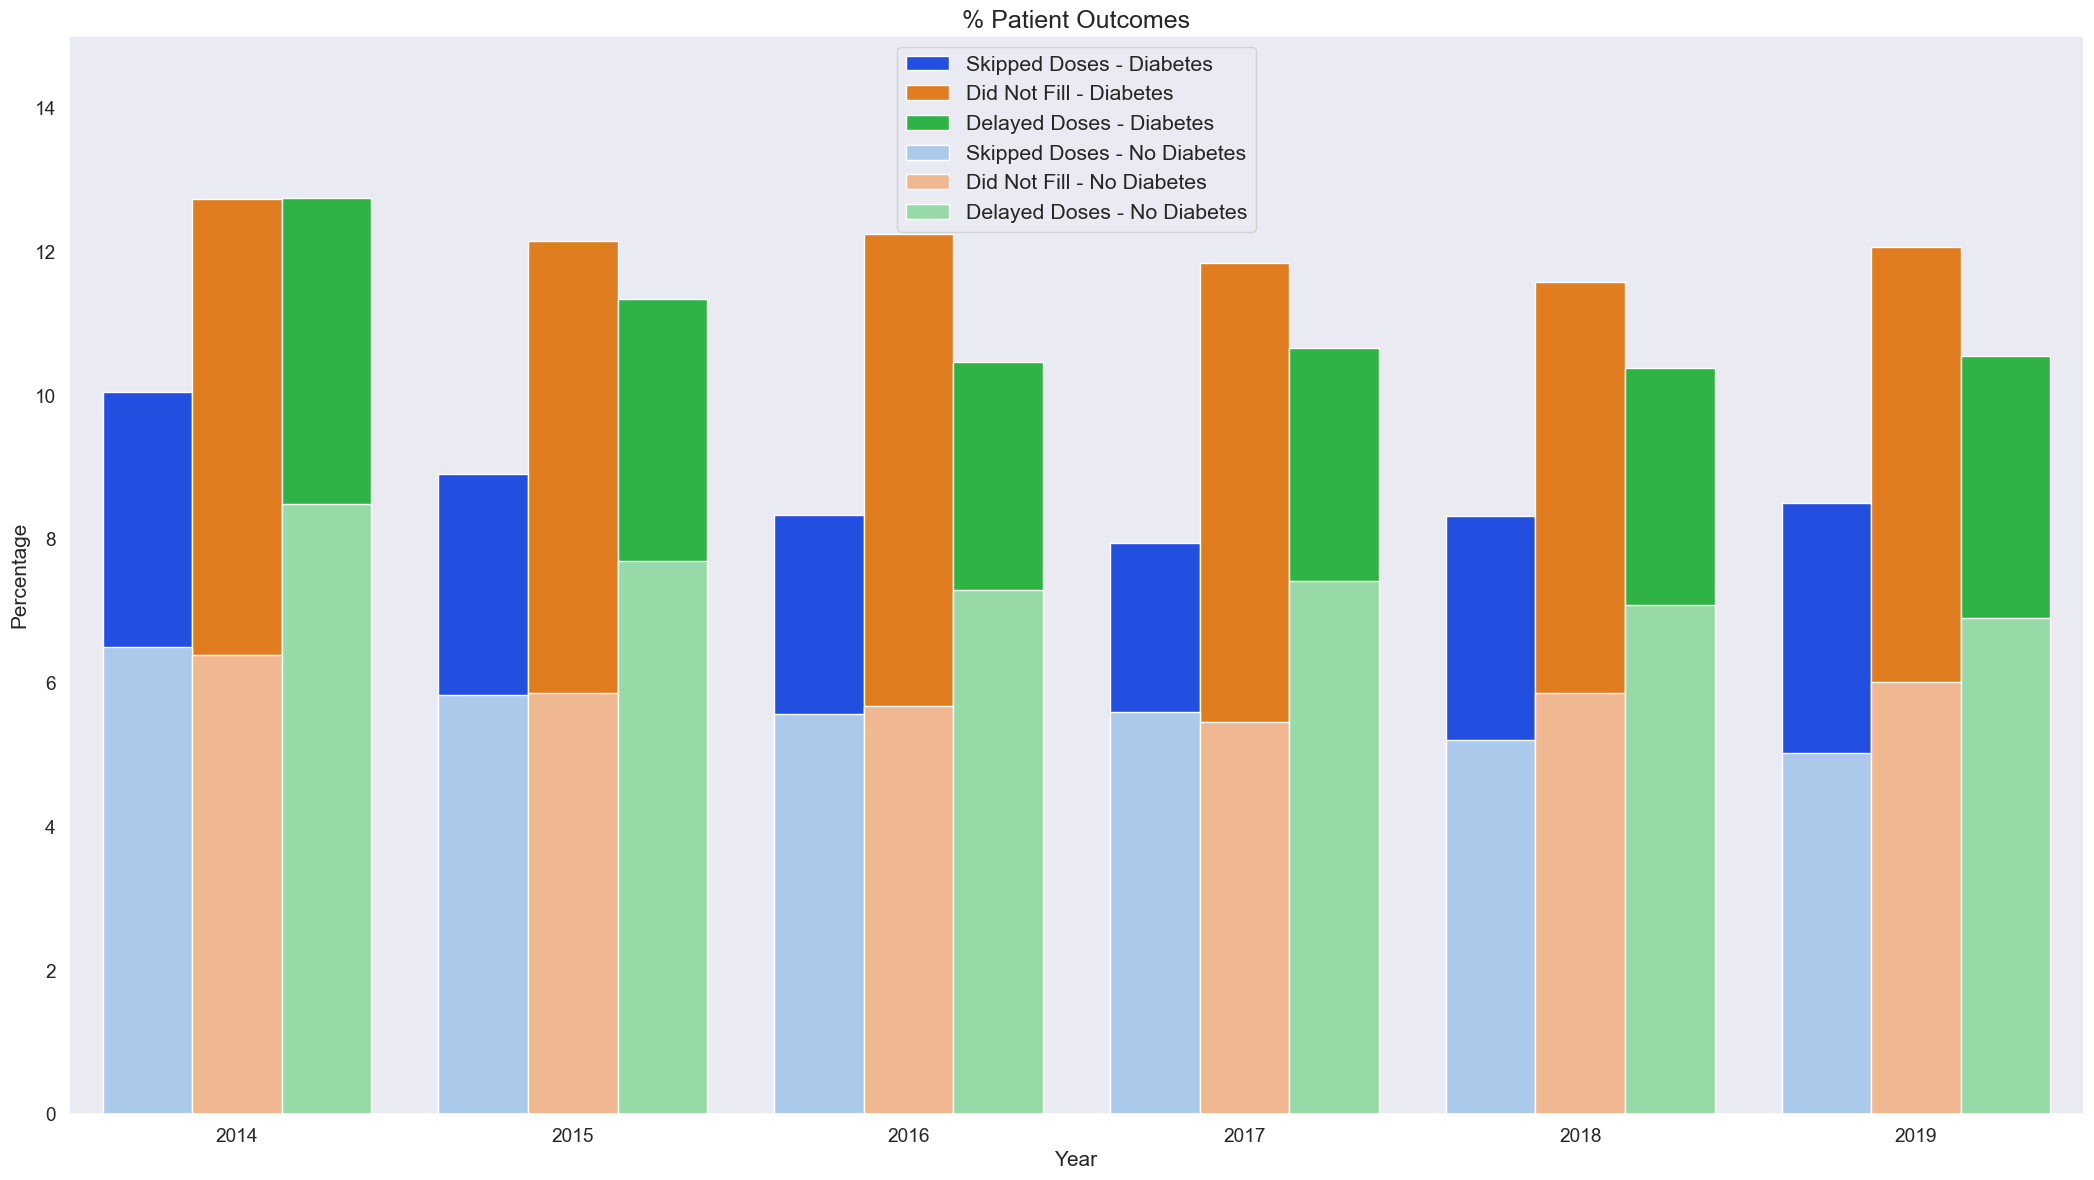

In [550]:


#stacked bar to show compliance of both with and without diabetes patients

final_outcomes = outcomes_merged_df[['Year','Condition Status','Outcome','Percentage']]

final_outcomes = pd.DataFrame(final_outcomes)
#print(final_outcomes)

axone = sns.set_style(style=None, rc=None )

figure, axone = plt.subplots(figsize=(26,14))

bar1 = sns.barplot(x="Year",  y="Percentage", hue= 'Outcome',data=Diabetes_outcome_merged, palette='bright', ax=axone).set(title='% Patient Outcomes')

axone.set_ylim(0,15)
sns.set(font_scale=1.4)

bar2 = sns.barplot(x="Year", y="Percentage", hue='Outcome' ,data= No_diabetes_outcome_merged,  palette ='pastel')

plt.title('% Patient Outcomes', fontsize=18)


plt.legend(loc='upper center')

axone.grid(False)


Text(0.75, 14, 'US Out of Pocket Avg')

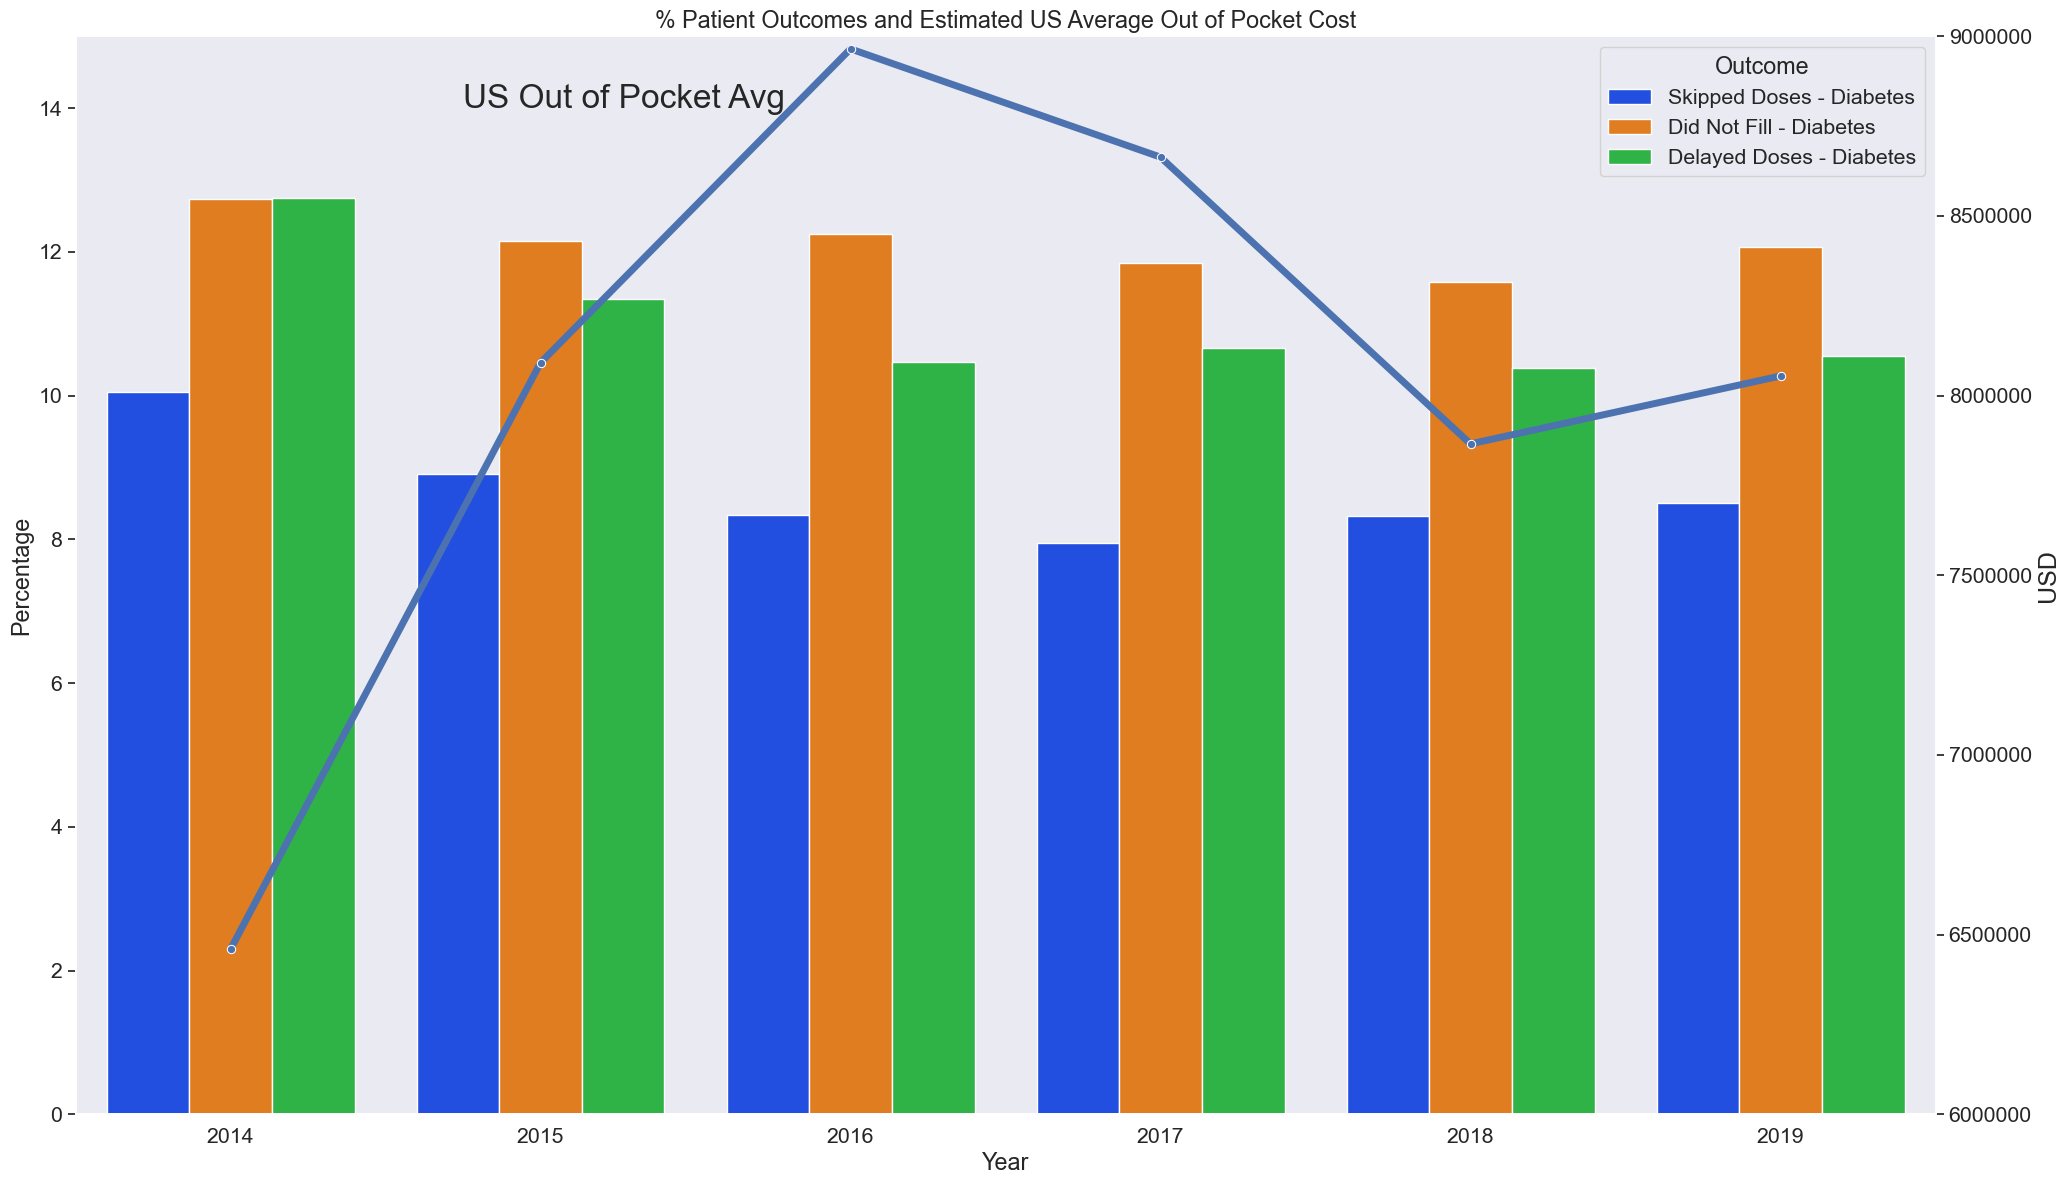

In [551]:
#updated line and bar plot to change colors and add styling details
#shows compliance of diabetes survey patients as bar graph and avg out of pocket cost as line graph

axone = sns.set_style(style=None, rc=None )

figure, axone = plt.subplots(figsize=(24,14))

ax2 = axone.twinx()
sns.lineplot(data = prices_w_outcomes['Total Cost'], marker='o', sort = False, ax=ax2,linewidth = 5)

ax2.yaxis.get_major_formatter().set_scientific(False)
ax2.yaxis.get_major_formatter().set_useOffset(False)

plt.ylabel('USD',fontsize=18)

bar1 = sns.barplot(x="Year",  y="Percentage", hue= 'Outcome',data=Diabetes_outcome_merged, palette='bright', ax=axone).set(title='% Patient Outcomes and Estimated US Average Out of Pocket Cost')


axone.set_ylim(0,15)
ax2.set_ylim(6000000,9000000)
sns.set(font_scale=2)

axone.grid(False)
ax2.grid(False)
axone.text(0.75,14, "US Out of Pocket Avg")
